In [1]:
%load_ext autoreload
%autoreload 2

# Introdução
1. Estudar a equação que passa de RGB para tons de cinza e avaliar se for realizada a média das camadas
2. Converter as imagens de RGB para HSI
3. Identificar as cores que tem na imagem (escolhendo as doze cores principais e apresentar de forma de histograma)
4. Identificar os objetos usando as cores
5. Identificar a intensidade das imagens usadas para apresentar a mudança de contraste

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio

In [3]:
def comparar_imgs(img_01, img_02):
    plt.figure(figsize=(17,12))
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plt.imshow(img_01, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.axis('off')
    plt.imshow(img_02, cmap='gray')
    plt.show()
       
    (score2) = peak_signal_noise_ratio(img_01, img_02)
    print('PSNR',score2)
    
    print('')
    (score,a) = structural_similarity(img_01, img_02, full=True)
    print("SSIM",score)

## As imagens utilizadas nesse notebook estão disponível em : 
[Link para as imagens no github](https://github.com/pedrodsk/pdi/tree/master/imgs_pdi)
* Atenção a cédula abaixo para a posição das imagens, um nível anterior ao notebook e na pasta imgs_pdi

In [4]:
imgs_list = glob.glob('../imgs_pdi/*')

In [5]:
imgs_list

['../imgs_pdi/pelagem.jpg',
 '../imgs_pdi/paisagem.jpg',
 '../imgs_pdi/hsv_python.png',
 '../imgs_pdi/pedestres02.jpg',
 '../imgs_pdi/cubo_magico.jpg',
 '../imgs_pdi/pre-historia01.jpeg',
 '../imgs_pdi/rainbow-fruits.jpg',
 '../imgs_pdi/leao.jpeg',
 '../imgs_pdi/pre-historia02.jpeg']

* Selecionar a imagem para todas as questões de acordo o index da lista acima

In [38]:
img = imgs_list[-5] # -5 refere-se a imagem do cubo mágico

In [7]:
img_gray = cv2.imread(img, 0)

In [8]:
img_original = cv2.imread(img)

# Questão 01

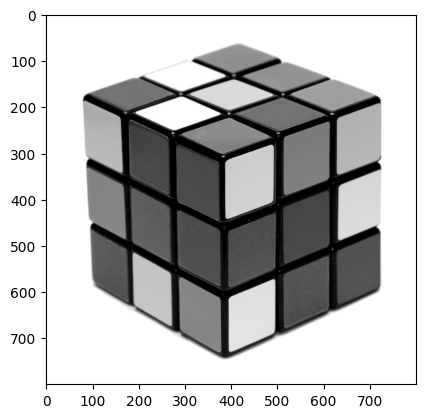

In [11]:
figura = plt.figure()
plt.imshow(img_gray2, cmap='gray')

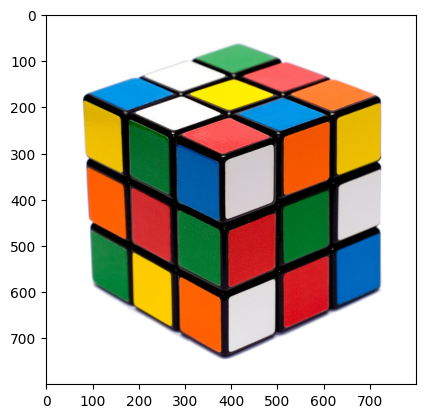

In [12]:
img_rgb = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb, cmap='gray')

In [13]:
(R, G, B) = cv2.split(img_rgb)

In [14]:
# B,G,R = cv2.split(img_rgb)

In [15]:
sum_B_G_R = img_rgb.sum(axis=2)

In [16]:
img_rgb.sum(axis=2)/3

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

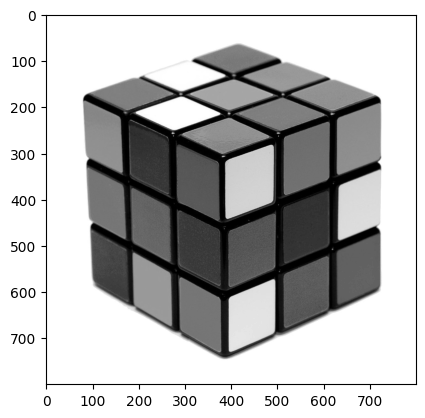

In [17]:
plt.imshow((sum_B_G_R/3), cmap='gray')

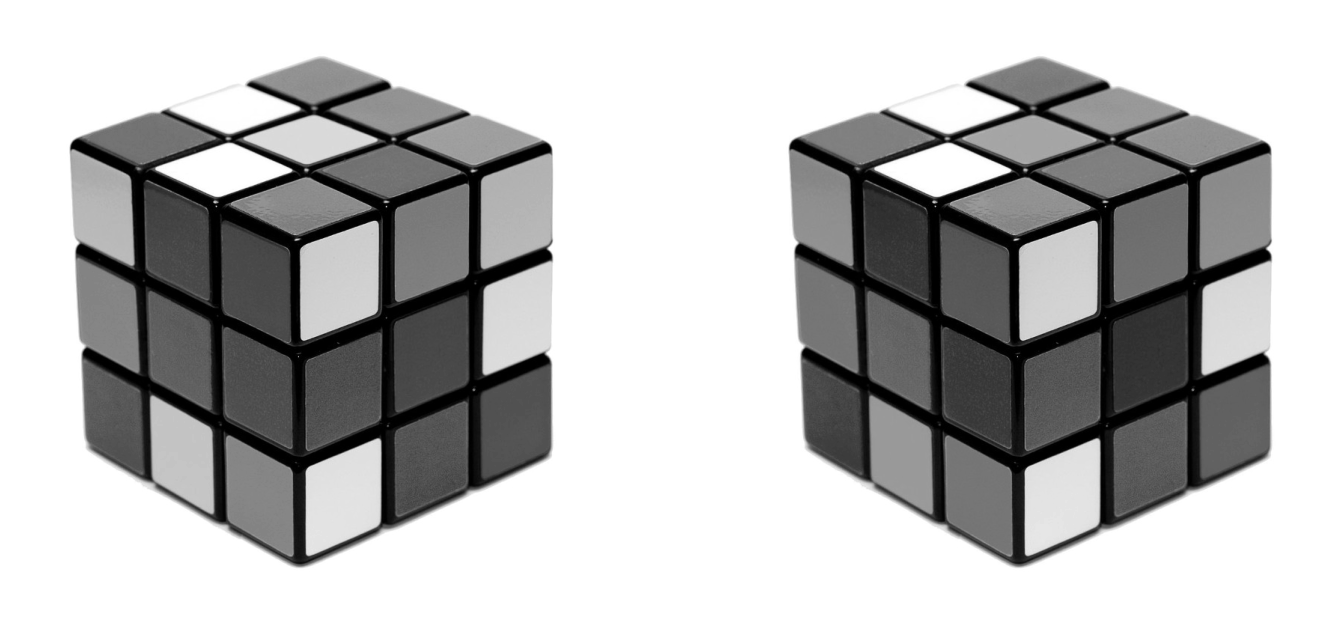

PSNR 26.175891883132216

SSIM 0.9893031139262899


/tmp/ipykernel_85605/2012296302.py:11: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  (score2) = peak_signal_noise_ratio(img_01, img_02)
/home/pedrodsk/anaconda3/envs/pdi/lib/python3.8/site-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


In [18]:
comparar_imgs(img_gray2,(sum_B_G_R/3))

# Questões 02 e 03

![HSV no python](../imgs_aux/hsv_python.png "HSV no python")

In [19]:
height = 5
width = 5
channels = 3
img_red = np.zeros((height, width, channels), np.uint8)
img_red[:] = (255, 0, 0)

img_green = np.zeros((height, width, channels), np.uint8)
img_green[:] = (0, 255, 0)

img_blue = np.zeros((height, width, channels), np.uint8)
img_blue[:] = (0, 0, 255)

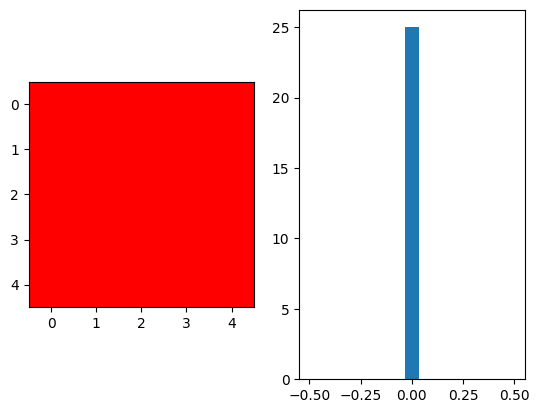

In [20]:
hsv_red = cv2.cvtColor(img_red, cv2.COLOR_RGB2HSV)
H_red, S_red, V_red = cv2.split(hsv_red)

plt.subplot(1,2,1)
plt.imshow(img_red)
plt.subplot(1,2,2)
plt.hist(H_red.ravel(),bins=15)
plt.show()

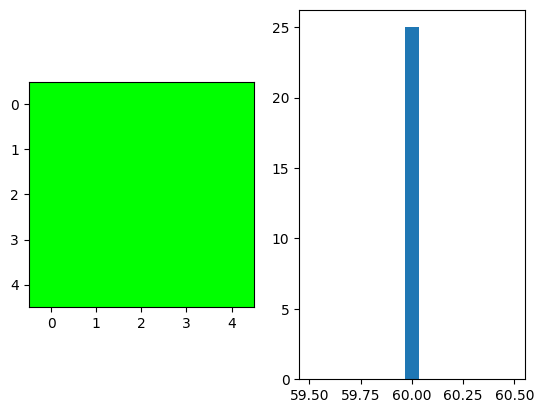

In [21]:
hsv_green = cv2.cvtColor(img_green, cv2.COLOR_RGB2HSV)
H_green, S_green, V_green = cv2.split(hsv_green)

plt.subplot(1,2,1)
plt.imshow(img_green)
plt.subplot(1,2,2)
plt.hist(H_green.ravel(),bins=15)
plt.show()

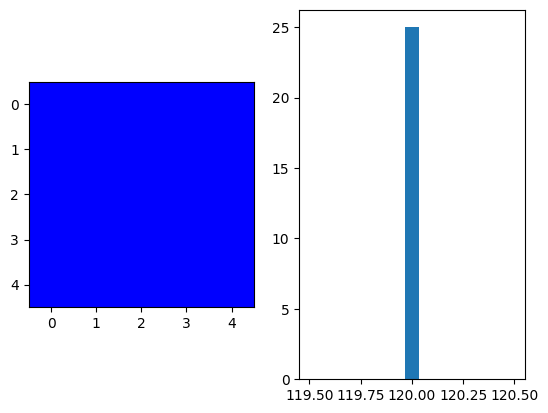

In [22]:
hsv_blue = cv2.cvtColor(img_blue, cv2.COLOR_RGB2HSV)
H_blue, S_blue, V_blue = cv2.split(hsv_blue)

plt.subplot(1,2,1)
plt.imshow(img_blue)
plt.subplot(1,2,2)
plt.hist(H_blue.ravel(),bins=15)
plt.show()

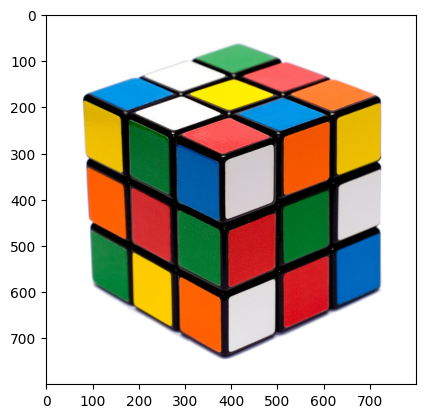

In [23]:
plt.imshow(img_rgb)

In [24]:
img_hsv = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2HSV)

In [25]:
H, S, V = cv2.split(img_hsv)

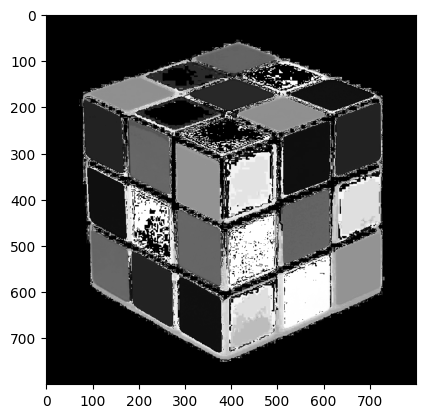

In [26]:
plt.imshow(H, cmap='gray')

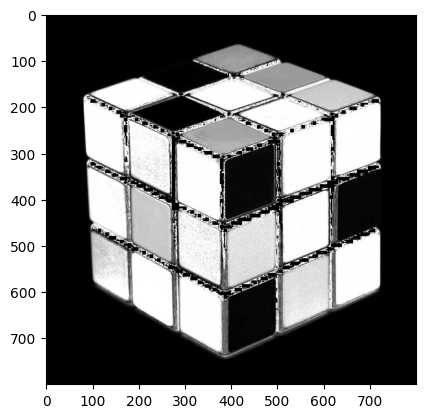

In [27]:
plt.imshow(S, cmap='gray')

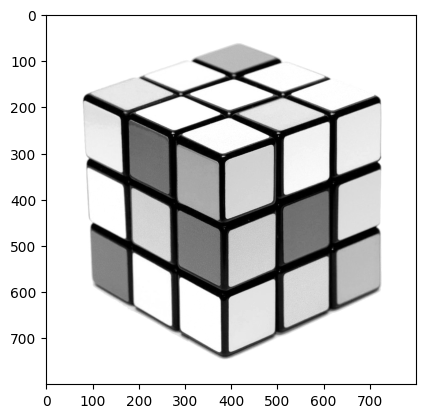

In [28]:
plt.imshow(V, cmap='gray')

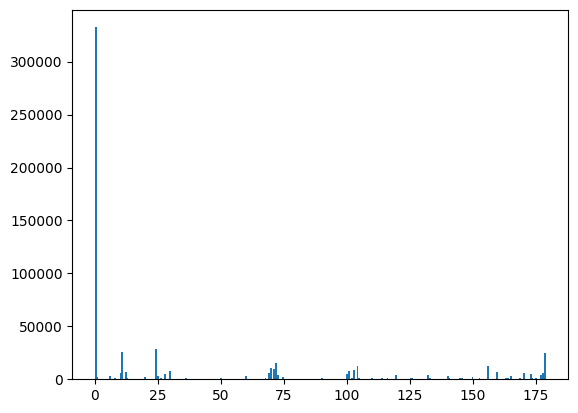

In [29]:
plt.hist(H.ravel(),bins=255)
plt.show()

# Questão 04

In [30]:
def extract_color(img_hsv, lower=[0,0,0], higher=[0,0,0]):
    
    lower_hsv_1 = np.array(lower)
    higher_hsv_1 = np.array(higher)
    mask= cv2.inRange(img_hsv, lower_hsv_1,higher_hsv_1)
    preprocess_img = cv2.bitwise_and(img_original, img_original ,mask=mask)
    return preprocess_img, mask

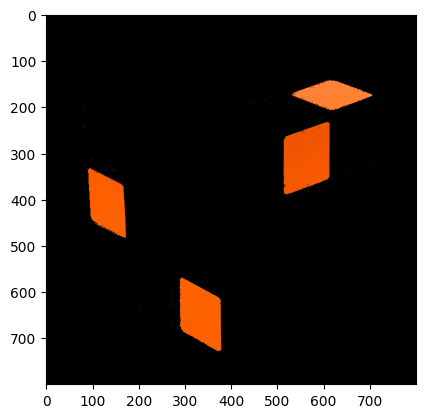

In [31]:
lower = [10, 80, 40]
higher = [15, 255, 255]

preprocess_img, mask = extract_color(img_hsv, lower, higher)

plt.imshow(cv2.cvtColor(preprocess_img, cv2.COLOR_BGR2RGB))

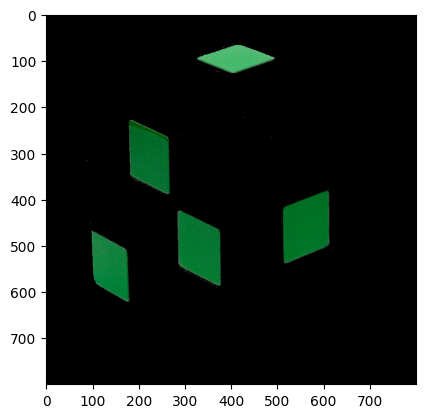

In [32]:
lower = [45, 10, 20]
higher = [75, 255, 255]

preprocess_img, mask = extract_color(img_hsv, lower, higher)

plt.imshow(cv2.cvtColor(preprocess_img, cv2.COLOR_BGR2RGB))

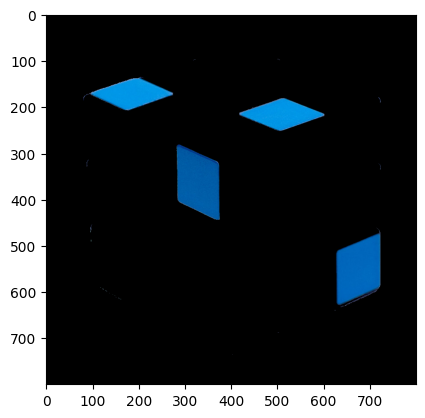

In [33]:
lower = [90, 80, 60]
higher = [120, 255, 255]

preprocess_img, mask = extract_color(img_hsv, lower, higher)

plt.imshow(cv2.cvtColor(preprocess_img, cv2.COLOR_BGR2RGB))

# Questão 05

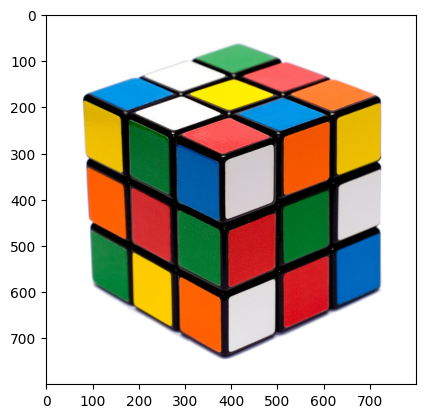

In [34]:
plt.imshow(img_rgb)

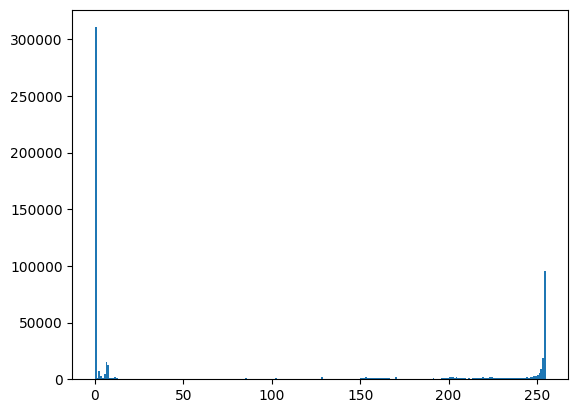

In [35]:
plt.hist(S.ravel(),bins=255)
plt.show()